In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.font_manager

In [73]:
rmsf = {}
rmsd = {}
for m in range(len(sys)):
    rmsf[m] = np.array([[float(xx) for xx in x.split()] for x in open(f'dat/{sys[m]}_rmsf.dat').readlines()[1:]]).T
    rmsd[m] = np.array([[float(xx) for xx in x.split()] for x in open(f'dat/{sys[m]}_rmsd.dat').readlines()[1:]]).T

In [69]:
def rcparams(plt, figsize, subplot):
    plt.rcParams["figure.figsize"]        = figsize
    plt.rcParams["figure.subplot.left"]   = subplot['left'] / figsize[0]
    plt.rcParams["figure.subplot.right"]  = 1.00 - subplot['right'] / figsize[0]
    plt.rcParams["figure.subplot.bottom"] = subplot['bottom'] / figsize[1]
    plt.rcParams["figure.subplot.top"]    = 1.00 - subplot['top'] / figsize[1]
    plt.rcParams["figure.subplot.wspace"] = subplot['wspace'] / figsize[0]
    plt.rcParams["figure.subplot.hspace"] = subplot['hspace'] / figsize[1]
    plt.rcParams["axes.grid"]             = subplot['grid']

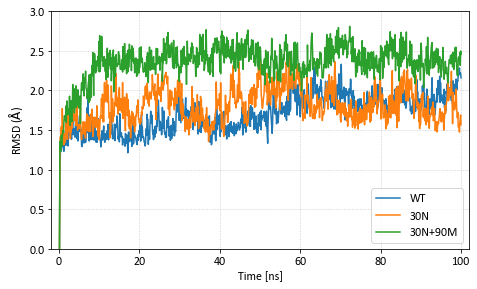

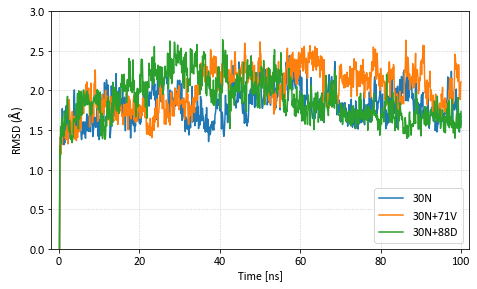

In [92]:
figsize = [6.5, 4.0]
subplot = {
    'left':   0.60,
    'right':  0.10,
    'bottom': 0.45,
    'top':    0.25,
    'wspace': 1.50,
    'hspace': 2.00,
    'grid': True,
          }
idx = [[0, 1, 2], [1, 3, 4]]
for m in range(2):
    with plt.style.context('./matplotlibrc'):
        rcparams(plt, figsize, subplot)
        fig, ax = plt.subplots(1,1)
    for n in range(len(idx[m])):
        x,y = rmsd[idx[m][n]]
        ax.plot(x * 0.1, y, label = lab[idx[m][n]])
    ax.set_xlabel('Time [ns]')
    ax.set_ylabel(r'RMSD ($\mathrm{\AA}$)')
    ax.set_ylim(0, 3.0)
    ax.legend()
    plt.savefig(f'fig/{job[m]}_rmsd.pdf', bbox_inches='', dpi = 300)

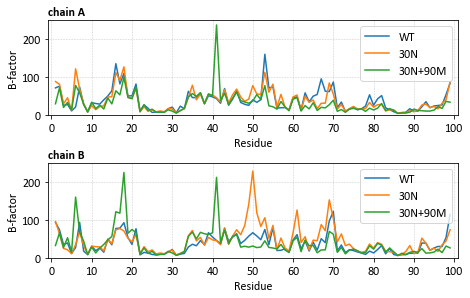

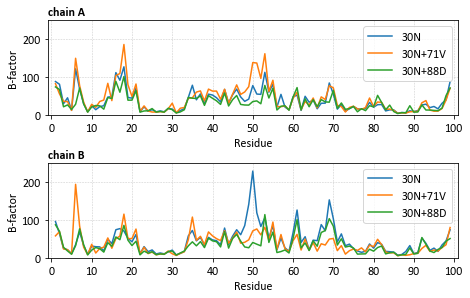

In [123]:
figsize = [6.5, 4.0]
subplot = {
    'left':   0.60,
    'right':  0.20,
    'bottom': 0.45,
    'top':    0.25,
    'wspace': 1.50,
    'hspace': 2.00,
    'grid': True,
          }
idx = [[0, 1, 2], [1, 3, 4]]
job = ['miya', 'ojima']
x = np.array(range(99)) + 1
for m in range(2):
    with plt.style.context('./matplotlibrc'):
        rcparams(plt, figsize, subplot)
        fig, ax = plt.subplots(2,1)
    ax[0].annotate('chain A', xy = (0, 1.05), xycoords = 'axes fraction', weight = 'bold', size = 12)
    ax[1].annotate('chain B', xy = (0, 1.05), xycoords = 'axes fraction', weight = 'bold', size = 12)
    for n in range(len(idx[m])):
        x_,y = rmsf[idx[m][n]]
        ax[0].plot(x, y[0:99], label = lab[idx[m][n]])
        ax[1].plot(x, y[99:198], label = lab[idx[m][n]])
    for i in range(2):
        ax[i].set_xlabel('Residue')
        ax[i].set_ylabel(r'B-factor')
        ax[i].set_xticks([n * 10 for n in range(11)])
        ax[i].set_ylim(0, 250.0)
        ax[i].legend()
    plt.savefig(f'fig/{job[m]}_rmsf.pdf', bbox_inches='', dpi = 300)